### Residual Analysis: Validating Model Assumptions

 - Residual analysis is the primary tool for determining whether the assumed
regression model is appropriate

 - Residual analysis is based on an examination of graphical plots

    - A plot of the residuals against values of the independent variable x

    - A plot of residuals against the predicted values of the dependent variable

    - A standardized residual plot

    - A normal probability plot

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [2]:
df1= pd.read_excel("icecream.xlsx")
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [4]:
reg1= ols(formula="Sales ~ Student_Population",data=df1)
fit1 = reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           2.55e-05
Time:                        17:23:03   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

C:\Users\Ishika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [7]:
#for printing anova table
print(anova_lm(fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


#### A plot of the residuals against values of the independent variable x

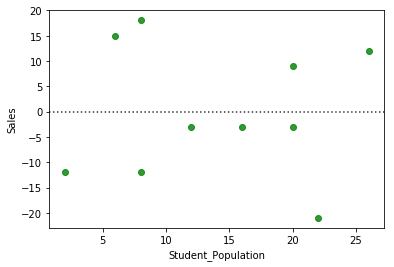

In [8]:
import seaborn as sns
sns.residplot(df1['Student_Population'],df1['Sales'],color="g")

In [9]:
influence = fit1.get_influence()
resid_student = influence.resid_studentized_external
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

#### A standardized residual plot against the independent variable x

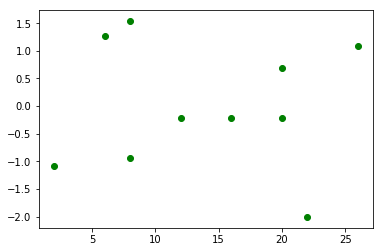

In [10]:
plt.figure()
plt.scatter(df1["Student_Population"],resid_student,color="green")


##### A normal probability plot

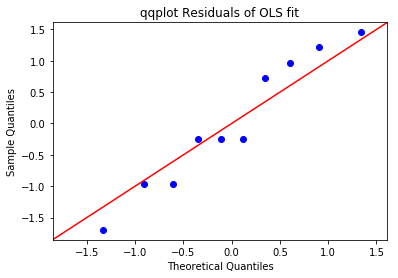

In [11]:
from scipy import stats
import statsmodels.api as sm
res = fit1.resid
probplot = sm.ProbPlot(res,stats.norm, fit=True)
fig= probplot.qqplot(line="45")
h=plt.title("qqplot Residuals of OLS fit")
plt.show()